<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/Dynamic_ML_Tunning_with_featSelect_SHAP_ROC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_EEG_features_2022.08.10_final.csv")

In [90]:
dataset.head()

,Subjects,Subject Type/Class,Test Type,Gap duration,n0_gap_peak_ms,p1_gap_peak_ms,n1_gap_peak_ms,p2_gap_peak_ms,n2_gap_peak_ms,p3_gap_peak_ms,...,Total EEG Power,Relative Alpha,Relative Beta,Relative Theta,Relative Delta,Relative Gamma,DTR,DTABR,ATR,ABR
0,'01_AJW_30_02',Control,Test,20ms,101,147,214,263,366,105,...,0.000032,0.1710,0.0955,0.561,0.152,0.0203,0.272,2.670,0.306,1.790
1,'01_CGO_63_01',Control,Test,20ms,132,155,217,301,383,131,...,0.000061,0.1330,0.1630,0.396,0.227,0.0804,0.574,2.100,0.336,0.814
2,'01_KBJ_45_01',Control,Test,20ms,107,160,221,305,396,128,...,0.000420,0.1520,0.3290,0.170,0.152,0.1980,0.895,0.669,0.894,0.461
3,'02_KCH_26_02',Control,Test,20ms,77,200,233,268,379,166,...,0.000334,0.0715,0.0599,0.227,0.591,0.0502,2.610,6.230,0.315,1.190
4,'03_HMK_49_01',Control,Test,20ms,153,128,224,264,337,147,...,0.000063,0.1470,0.1030,0.434,0.279,0.0377,0.643,2.860,0.338,1.420


In [91]:
X = dataset.iloc[:, 4:]
y = dataset.iloc[:, 1]


#Feature Selection

In [92]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)

In [93]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [94]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

<font color='blue' size=6><b>Input</b></font>

In [95]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 4


In [96]:
imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

              Specs      Score
47  p3_gap_peak_amp  45.163320
72   gap_auc_n1p2_R  45.064316
43  p1_gap_peak_amp  42.386323
46  n2_gap_peak_amp  39.547251


In [97]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [98]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 1]

In [99]:
X_new.shape

(330, 4)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

In [101]:
result={}



---





---



#ADABOOST

In [102]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1)]=accuracy_score(y_test, y_pred)

[[30  9]
 [12 15]]
              precision    recall  f1-score   support

     Control       0.71      0.77      0.74        39
     Patient       0.62      0.56      0.59        27

    accuracy                           0.68        66
   macro avg       0.67      0.66      0.66        66
weighted avg       0.68      0.68      0.68        66

Accurecy:  0.6818181818181818


1/200 round completed......................... Accurecy: 0.7121212121212122
2/200 round completed......................... Accurecy: 0.7272727272727273
3/200 round completed......................... Accurecy: 0.7272727272727273
4/200 round completed......................... Accurecy: 0.7424242424242424
5/200 round completed......................... Accurecy: 0.7424242424242424
6/200 round completed......................... Accurecy: 0.7424242424242424
7/200 round completed......................... Accurecy: 0.7272727272727273
8/200 round completed......................... Accurecy: 0.7272727272727273
9/200 round completed......................... Accurecy: 0.7272727272727273
10/200 round completed......................... Accurecy: 0.7272727272727273
11/200 round completed......................... Accurecy: 0.7272727272727273
12/200 round completed......................... Accurecy: 0.696969696969697
13/200 round completed......................... Accurecy: 0.6818181818181818
14/200 ro

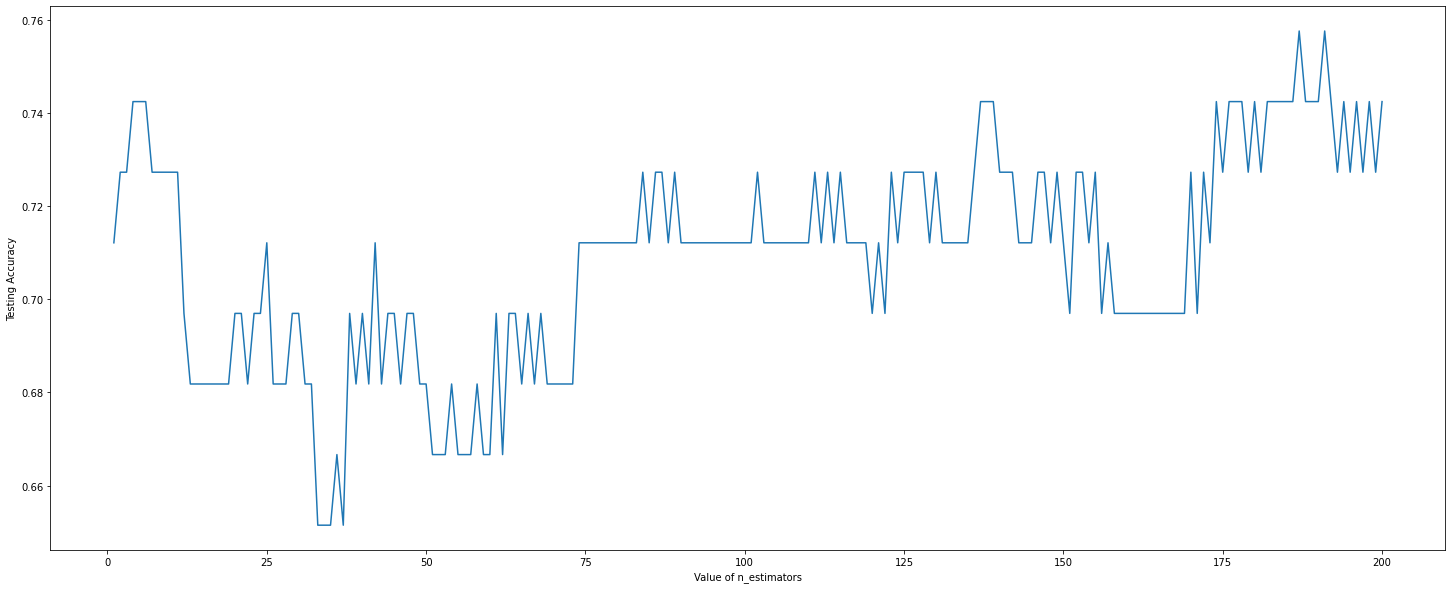

In [103]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [104]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1)]=accuracy_score(y_test, y_pred)

[[30  9]
 [ 7 20]]
              precision    recall  f1-score   support

     Control       0.81      0.77      0.79        39
     Patient       0.69      0.74      0.71        27

    accuracy                           0.76        66
   macro avg       0.75      0.75      0.75        66
weighted avg       0.76      0.76      0.76        66

Accurecy:  0.7575757575757576




---



---



#Graddient Boosting

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2)]=accuracy_score(y_test, y_pred)

[[31  8]
 [ 8 19]]
              precision    recall  f1-score   support

     Control       0.79      0.79      0.79        39
     Patient       0.70      0.70      0.70        27

    accuracy                           0.76        66
   macro avg       0.75      0.75      0.75        66
weighted avg       0.76      0.76      0.76        66

Accurecy:  0.7575757575757576


1/150 round completed......................... Accurecy: 0.7424242424242424
2/150 round completed......................... Accurecy: 0.7424242424242424
3/150 round completed......................... Accurecy: 0.7727272727272727
4/150 round completed......................... Accurecy: 0.7878787878787878
5/150 round completed......................... Accurecy: 0.7272727272727273
6/150 round completed......................... Accurecy: 0.7878787878787878
7/150 round completed......................... Accurecy: 0.7878787878787878
8/150 round completed......................... Accurecy: 0.7878787878787878
9/150 round completed......................... Accurecy: 0.7878787878787878
10/150 round completed......................... Accurecy: 0.7878787878787878
11/150 round completed......................... Accurecy: 0.7727272727272727
12/150 round completed......................... Accurecy: 0.7727272727272727
13/150 round completed......................... Accurecy: 0.7727272727272727
14/150 r

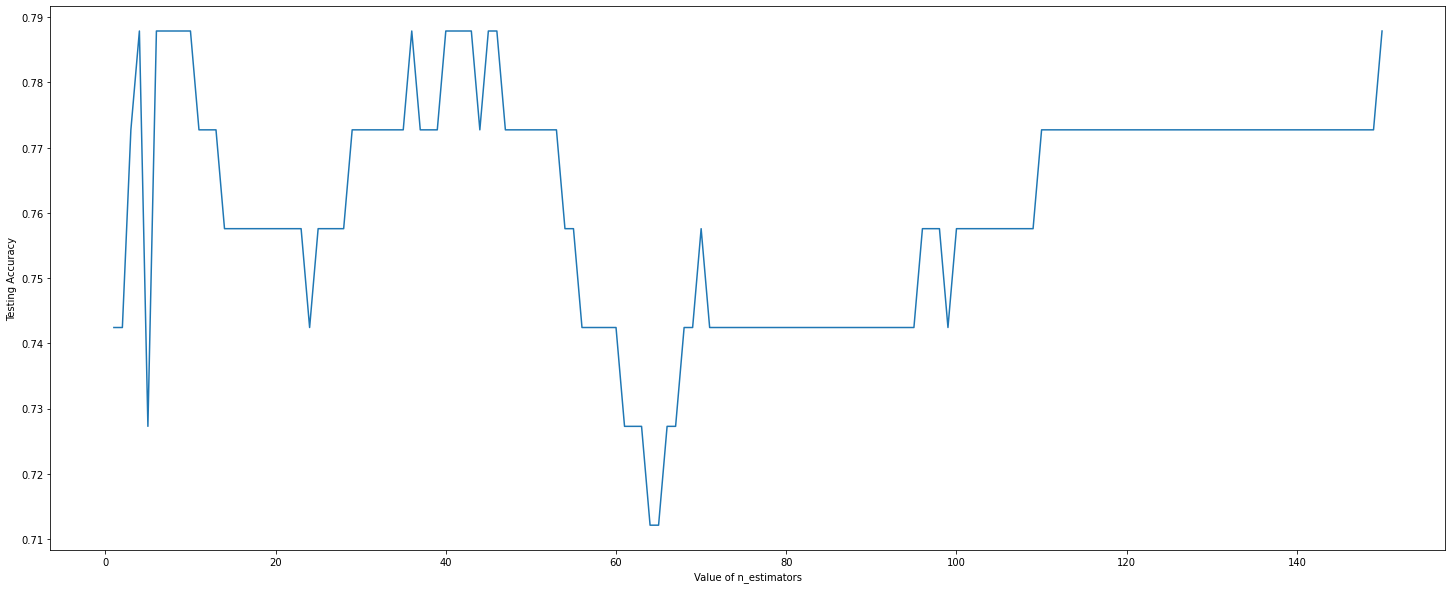

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.7272727272727273
2/30 round completed......................... Accurecy: 0.7575757575757576
3/30 round completed......................... Accurecy: 0.7575757575757576
4/30 round completed......................... Accurecy: 0.7727272727272727
5/30 round completed......................... Accurecy: 0.7575757575757576
6/30 round completed......................... Accurecy: 0.7727272727272727
7/30 round completed......................... Accurecy: 0.7878787878787878
8/30 round completed......................... Accurecy: 0.7878787878787878
9/30 round completed......................... Accurecy: 0.7575757575757576
10/30 round completed......................... Accurecy: 0.7272727272727273
11/30 round completed......................... Accurecy: 0.7272727272727273
12/30 round completed......................... Accurecy: 0.7424242424242424
13/30 round completed......................... Accurecy: 0.7575757575757576
14/30 round completed

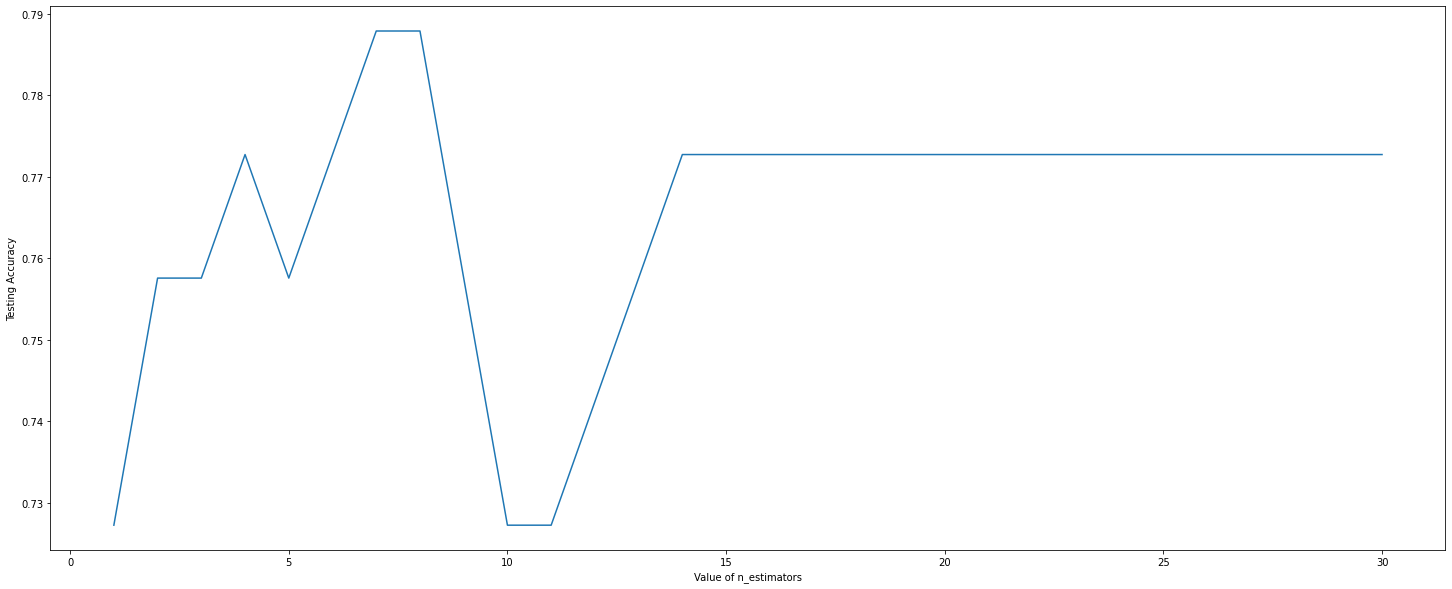

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2)]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 8 19]]
              precision    recall  f1-score   support

     Control       0.80      0.85      0.83        39
     Patient       0.76      0.70      0.73        27

    accuracy                           0.79        66
   macro avg       0.78      0.77      0.78        66
weighted avg       0.79      0.79      0.79        66

Accurecy:  0.7878787878787878


In [109]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2)]=accuracy_score(y_test, y_pred)

[[32  7]
 [ 7 20]]
              precision    recall  f1-score   support

     Control       0.82      0.82      0.82        39
     Patient       0.74      0.74      0.74        27

    accuracy                           0.79        66
   macro avg       0.78      0.78      0.78        66
weighted avg       0.79      0.79      0.79        66

Accurecy:  0.7878787878787878


In [110]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2)]=accuracy_score(y_test, y_pred)

[[31  8]
 [ 9 18]]
              precision    recall  f1-score   support

     Control       0.78      0.79      0.78        39
     Patient       0.69      0.67      0.68        27

    accuracy                           0.74        66
   macro avg       0.73      0.73      0.73        66
weighted avg       0.74      0.74      0.74        66

Accurecy:  0.7424242424242424




---



---



#Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3)]=accuracy_score(y_test, y_pred)

[[30  9]
 [ 9 18]]
              precision    recall  f1-score   support

     Control       0.77      0.77      0.77        39
     Patient       0.67      0.67      0.67        27

    accuracy                           0.73        66
   macro avg       0.72      0.72      0.72        66
weighted avg       0.73      0.73      0.73        66

Accurecy:  0.7272727272727273


1/150 round completed......................... Accurecy: 0.696969696969697
2/150 round completed......................... Accurecy: 0.7878787878787878
3/150 round completed......................... Accurecy: 0.696969696969697
4/150 round completed......................... Accurecy: 0.7121212121212122
5/150 round completed......................... Accurecy: 0.696969696969697
6/150 round completed......................... Accurecy: 0.7575757575757576
7/150 round completed......................... Accurecy: 0.7424242424242424
8/150 round completed......................... Accurecy: 0.7272727272727273
9/150 round completed......................... Accurecy: 0.696969696969697
10/150 round completed......................... Accurecy: 0.7727272727272727
11/150 round completed......................... Accurecy: 0.7575757575757576
12/150 round completed......................... Accurecy: 0.7878787878787878
13/150 round completed......................... Accurecy: 0.7878787878787878
14/150 round

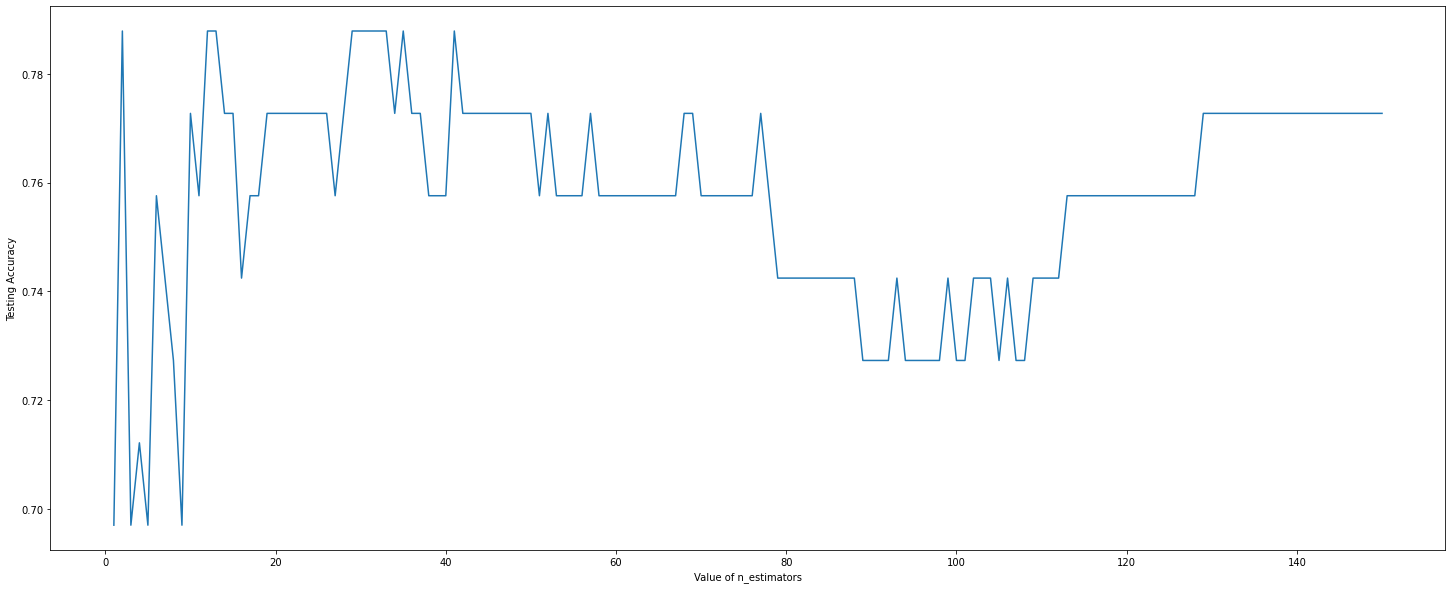

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.7121212121212122
2/150 round completed......................... Accurecy: 0.7121212121212122
3/150 round completed......................... Accurecy: 0.7575757575757576
4/150 round completed......................... Accurecy: 0.7727272727272727
5/150 round completed......................... Accurecy: 0.7575757575757576
6/150 round completed......................... Accurecy: 0.7575757575757576
7/150 round completed......................... Accurecy: 0.7727272727272727
8/150 round completed......................... Accurecy: 0.7727272727272727
9/150 round completed......................... Accurecy: 0.7575757575757576
10/150 round completed......................... Accurecy: 0.7727272727272727
11/150 round completed......................... Accurecy: 0.7424242424242424
12/150 round completed......................... Accurecy: 0.7575757575757576
13/150 round completed......................... Accurecy: 0.7272727272727273
14/150 r

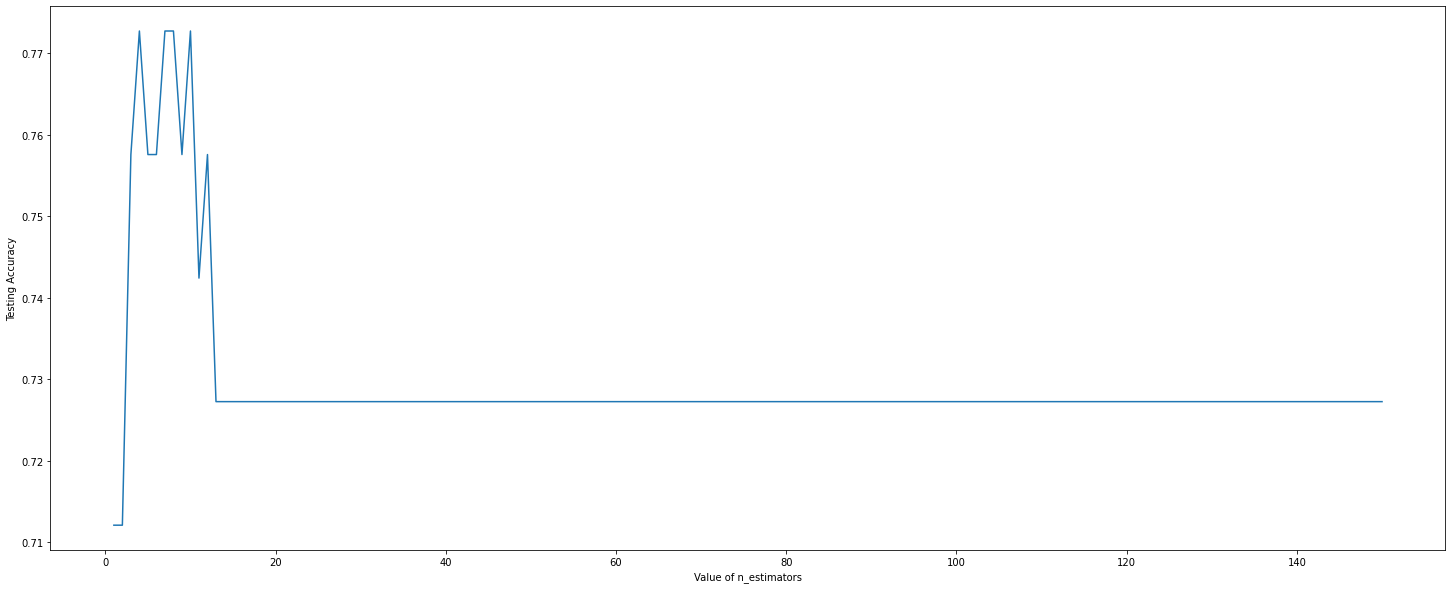

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3)]=accuracy_score(y_test, y_pred)

[[35  4]
 [10 17]]
              precision    recall  f1-score   support

     Control       0.78      0.90      0.83        39
     Patient       0.81      0.63      0.71        27

    accuracy                           0.79        66
   macro avg       0.79      0.76      0.77        66
weighted avg       0.79      0.79      0.78        66

Accurecy:  0.7878787878787878


In [115]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3)]=accuracy_score(y_test, y_pred)

[[30  9]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.83      0.77      0.80        39
     Patient       0.70      0.78      0.74        27

    accuracy                           0.77        66
   macro avg       0.77      0.77      0.77        66
weighted avg       0.78      0.77      0.77        66

Accurecy:  0.7727272727272727


In [116]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3)]=accuracy_score(y_test, y_pred)

[[26 13]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.81      0.67      0.73        39
     Patient       0.62      0.78      0.69        27

    accuracy                           0.71        66
   macro avg       0.72      0.72      0.71        66
weighted avg       0.73      0.71      0.71        66

Accurecy:  0.7121212121212122




---



---



#XGB

In [117]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4)]=accuracy_score(y_test, y_pred)

[[32  7]
 [ 8 19]]
              precision    recall  f1-score   support

     Control       0.80      0.82      0.81        39
     Patient       0.73      0.70      0.72        27

    accuracy                           0.77        66
   macro avg       0.77      0.76      0.76        66
weighted avg       0.77      0.77      0.77        66

Accurecy:  0.7727272727272727


1/250 round completed......................... Accurecy: 0.7424242424242424
2/250 round completed......................... Accurecy: 0.7424242424242424
3/250 round completed......................... Accurecy: 0.7575757575757576
4/250 round completed......................... Accurecy: 0.7575757575757576
5/250 round completed......................... Accurecy: 0.7575757575757576
6/250 round completed......................... Accurecy: 0.7575757575757576
7/250 round completed......................... Accurecy: 0.7575757575757576
8/250 round completed......................... Accurecy: 0.7575757575757576
9/250 round completed......................... Accurecy: 0.7575757575757576
10/250 round completed......................... Accurecy: 0.7424242424242424
11/250 round completed......................... Accurecy: 0.7424242424242424
12/250 round completed......................... Accurecy: 0.7575757575757576
13/250 round completed......................... Accurecy: 0.7575757575757576
14/250 r

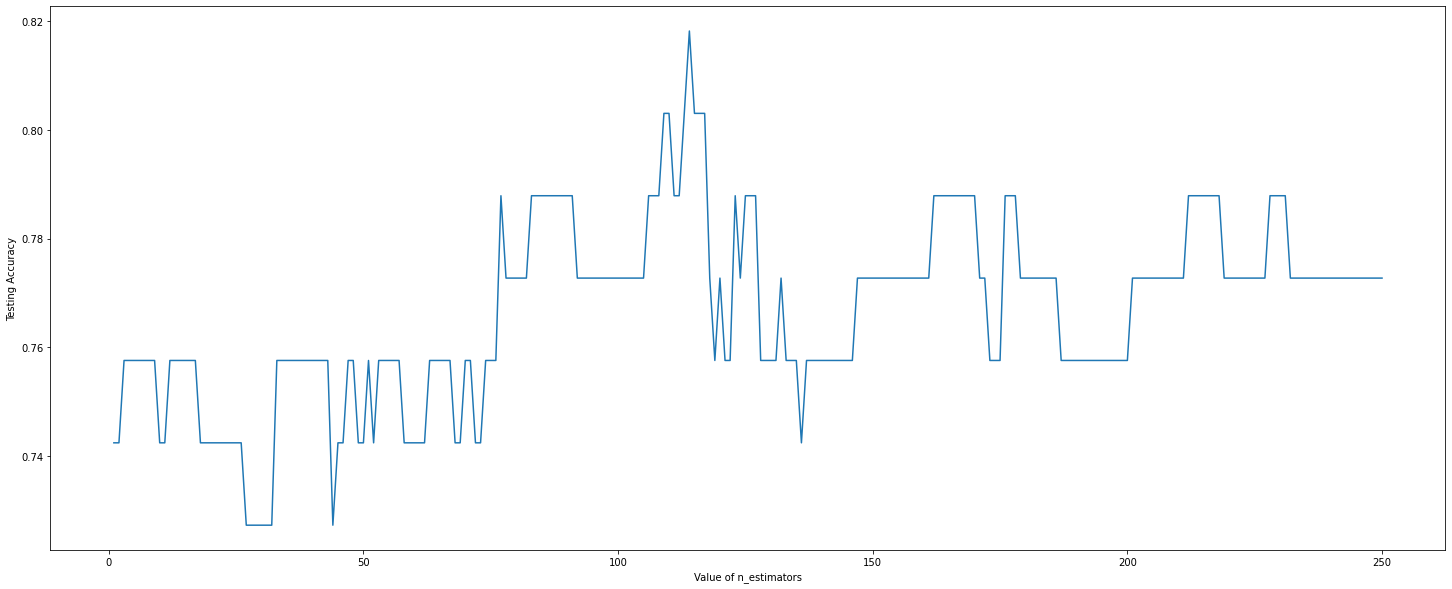

In [118]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.7424242424242424
2/250 round completed......................... Accurecy: 0.7121212121212122
3/250 round completed......................... Accurecy: 0.7727272727272727
4/250 round completed......................... Accurecy: 0.803030303030303
5/250 round completed......................... Accurecy: 0.803030303030303
6/250 round completed......................... Accurecy: 0.7878787878787878
7/250 round completed......................... Accurecy: 0.7575757575757576
8/250 round completed......................... Accurecy: 0.7878787878787878
9/250 round completed......................... Accurecy: 0.7424242424242424
10/250 round completed......................... Accurecy: 0.7575757575757576
11/250 round completed......................... Accurecy: 0.7424242424242424
12/250 round completed......................... Accurecy: 0.7424242424242424
13/250 round completed......................... Accurecy: 0.7727272727272727
14/250 rou

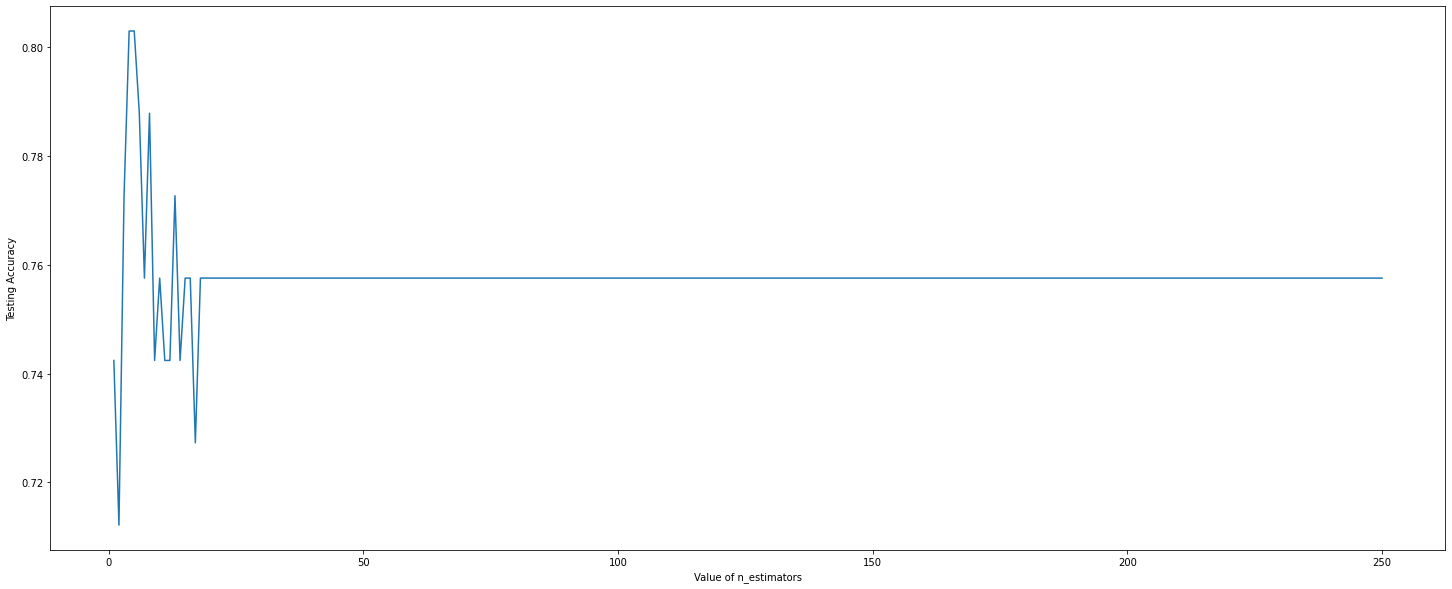

In [119]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [120]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4)]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 7 20]]
              precision    recall  f1-score   support

     Control       0.82      0.85      0.84        39
     Patient       0.77      0.74      0.75        27

    accuracy                           0.80        66
   macro avg       0.80      0.79      0.80        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303


In [121]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4)]=accuracy_score(y_test, y_pred)

[[34  5]
 [ 7 20]]
              precision    recall  f1-score   support

     Control       0.83      0.87      0.85        39
     Patient       0.80      0.74      0.77        27

    accuracy                           0.82        66
   macro avg       0.81      0.81      0.81        66
weighted avg       0.82      0.82      0.82        66

Accurecy:  0.8181818181818182


In [122]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4)]=accuracy_score(y_test, y_pred)

[[32  7]
 [ 8 19]]
              precision    recall  f1-score   support

     Control       0.80      0.82      0.81        39
     Patient       0.73      0.70      0.72        27

    accuracy                           0.77        66
   macro avg       0.77      0.76      0.76        66
weighted avg       0.77      0.77      0.77        66

Accurecy:  0.7727272727272727


#KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5)]=accuracy_score(y_test, y_pred)

[[31  8]
 [ 9 18]]
              precision    recall  f1-score   support

     Control       0.78      0.79      0.78        39
     Patient       0.69      0.67      0.68        27

    accuracy                           0.74        66
   macro avg       0.73      0.73      0.73        66
weighted avg       0.74      0.74      0.74        66

Accurecy:  0.7424242424242424


1/200 round completed......................... Accurecy: 0.7575757575757576
2/200 round completed......................... Accurecy: 0.6666666666666666
3/200 round completed......................... Accurecy: 0.7727272727272727
4/200 round completed......................... Accurecy: 0.7121212121212122
5/200 round completed......................... Accurecy: 0.7424242424242424
6/200 round completed......................... Accurecy: 0.7272727272727273
7/200 round completed......................... Accurecy: 0.7121212121212122
8/200 round completed......................... Accurecy: 0.696969696969697
9/200 round completed......................... Accurecy: 0.6666666666666666
10/200 round completed......................... Accurecy: 0.696969696969697
11/200 round completed......................... Accurecy: 0.6666666666666666
12/200 round completed......................... Accurecy: 0.6666666666666666
13/200 round completed......................... Accurecy: 0.6666666666666666
14/200 rou

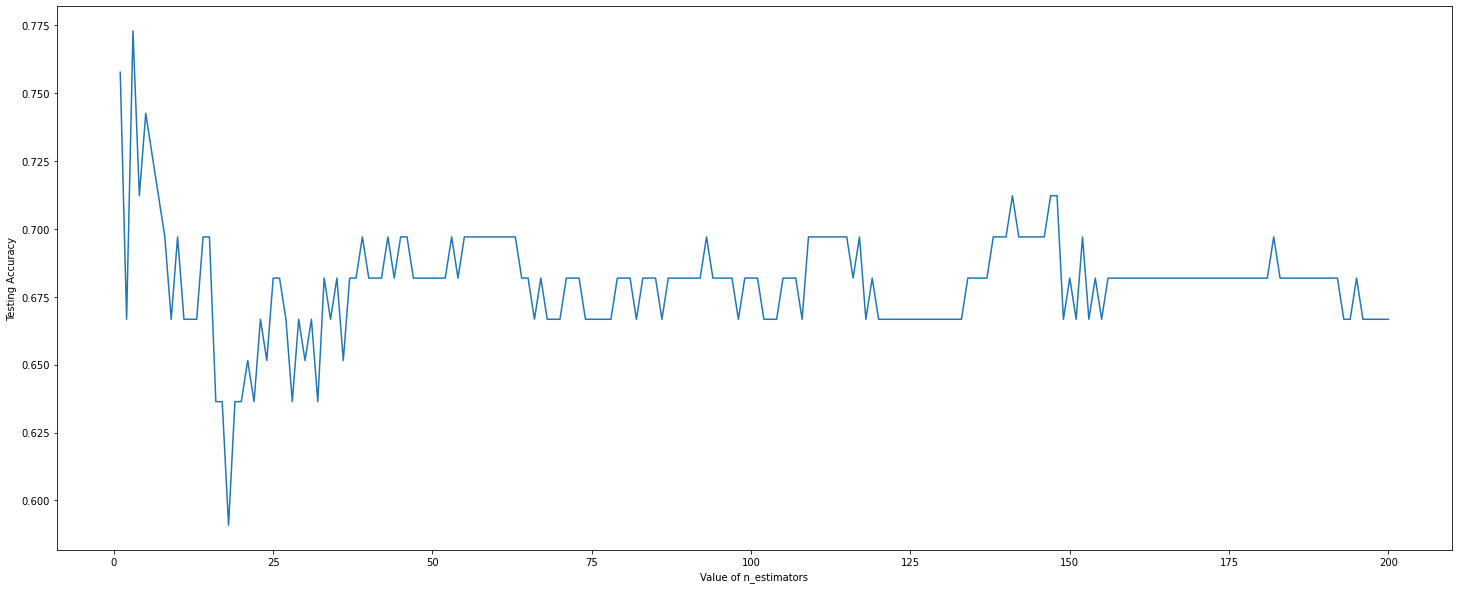

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=200
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5)]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 9 18]]
              precision    recall  f1-score   support

     Control       0.79      0.85      0.81        39
     Patient       0.75      0.67      0.71        27

    accuracy                           0.77        66
   macro avg       0.77      0.76      0.76        66
weighted avg       0.77      0.77      0.77        66

Accurecy:  0.7727272727272727


#NB

In [126]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6)]=accuracy_score(y_test, y_pred)

[[24 15]
 [ 7 20]]
              precision    recall  f1-score   support

     Control       0.77      0.62      0.69        39
     Patient       0.57      0.74      0.65        27

    accuracy                           0.67        66
   macro avg       0.67      0.68      0.67        66
weighted avg       0.69      0.67      0.67        66

Accurecy:  0.6666666666666666




---



---



#Result

In [127]:
for i in result:
  print(i," : ",result[i])
  print("---------------------------------------------------------------")
  print()

(AdaBoostClassifier(random_state=0), 1)  :  0.6818181818181818
---------------------------------------------------------------

(AdaBoostClassifier(n_estimators=187, random_state=0), 1)  :  0.7575757575757576
---------------------------------------------------------------

(GradientBoostingClassifier(random_state=0), 2)  :  0.7575757575757576
---------------------------------------------------------------

(GradientBoostingClassifier(n_estimators=4, random_state=0), 2)  :  0.7878787878787878
---------------------------------------------------------------

(GradientBoostingClassifier(max_depth=7, random_state=0), 2)  :  0.7878787878787878
---------------------------------------------------------------

(GradientBoostingClassifier(max_depth=7, n_estimators=4, random_state=0), 2)  :  0.7424242424242424
---------------------------------------------------------------

(RandomForestClassifier(random_state=0), 3)  :  0.7272727272727273
---------------------------------------------------------

In [130]:
best_models=[]
sorted_values = sorted(result.values(),reverse=True) 
sorted_result = {}

for i in sorted_values:
    for k in result.keys():
        if result[k] == i:
            sorted_result[k] = result[k]
            break



flage=[]
it=0

print("Best Models and Accuracy")
for i in sorted_result:
  if it==4:
    break
  if i[1] not in flage:
    print("---------------")
    best_models.append(i[0])
    print(i[0]," : ",sorted_result[i])
    y_pred = i[0].predict(X_test)

    flage.append(i[1])
    it+=1

Best Models and Accuracy
---------------
XGBClassifier(n_estimators=114)  :  0.8181818181818182
---------------
GradientBoostingClassifier(n_estimators=4, random_state=0)  :  0.7878787878787878
---------------
RandomForestClassifier(max_depth=4, random_state=0)  :  0.7727272727272727
---------------
AdaBoostClassifier(n_estimators=187, random_state=0)  :  0.7575757575757576
